# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [451]:
#Imports
# !pip install pandas
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [452]:
#Code
t_accident = pd.read_csv('./../data/saudi-arabia-traffic-accidents-2008.csv', sep=';')
t_licenses =  pd.read_csv('./../data/saudi-arabia-driving-licenses-2004-2008.csv', sep=';')


In [453]:
# First two columns is dump, start from third col 
t_accident.iloc[:,2:].head(5)

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"


In [454]:
t_licenses.iloc[:,1:].head()

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"


In [455]:
# Drop unmeaning columns
t_accident.drop(columns=['Unnamed: 0'], inplace=True)
t_accident.drop(columns=['Unnamed: 0.1'], inplace=True) 
t_licenses.drop(columns=['Unnamed: 0'], inplace=True) 

In [456]:
# Delete square brackets from year col in t_accident
# Regex way
pattern_brackets = [r'\(*\)','\(?']
pattern_digit = r'[^0-9]'
t_accident.Year.replace(pattern_brackets, '', inplace=True, regex=True)
t_licenses.Year.replace(pattern_brackets, '', inplace=True, regex=True)

# Delete letters from Value in accidents and Driving Liceses in licenses
t_accident.Value.replace(pattern_digit, '', inplace=True, regex=True)
t_licenses['Driving Liceses'].replace(pattern_digit, '', inplace=True, regex=True)

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [457]:
#Code
print(t_accident.head(10))

   Year            Region                    Indicator  Value  \
0  2016            Makkah  No. of Casualties - Injured  12383   
1  2016    Eastern Region     No. of Casualties - Dead   1113   
2  2016            Tabouk     No. of Casualties - Dead    434   
3  2016              Hail     No. of Casualties - Dead    299   
4  2016              Hail             No. of Accidents  10199   
5  2016  Northern Boarder     No. of Casualties - Dead    193   
6  2017             Jazan             No. of Accidents  22161   
7  2017           Al-Jouf             No. of Accidents  10469   
8  2017             Total     No. of Casualties - Dead   7489   
9  2016  Northern Boarder  No. of Casualties - Injured    631   

                   geo_point_2d  
0   21.628962766, 41.2636898334  
1  23.2883307307, 50.1478302439  
2    27.90165499, 37.2598581394  
3   27.400845724, 41.4406960508  
4   27.400845724, 41.4406960508  
5   30.197074783, 41.8171186952  
6  17.2072313962, 42.6525807422  
7  29.967744

#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

# Answer: 
traffic-accidents
Year: All accident happened between 2016 and 2017.
Region: 14 different region with 6 accident per each.
geo_point_2d: it's refering to region location, we can fill missing values with refering to region value.

driving-licenses:
There is 350 record
Year: we have values from 25 different years, with same number of licenses issuance per year which is 14 licenses, 
geo_point_2d: We have missing 25 values.
Administritive Area: we have 25 area.
describe()
value_counts()

In [458]:
t_accident.describe()
t_accident[t_accident.isna().any(axis=1)]

,Year,Region,Indicator,Value,geo_point_2d
8,2017,Total,No. of Casualties - Dead,7489,NaN
29,2016,Total,No. of Accidents,533380,NaN
30,2016,Total,No. of Casualties - Injured,38120,NaN
68,2017,Total,No. of Accidents,460488,NaN
69,2017,Total,No. of Casualties - Injured,33199,NaN
77,2016,Total,No. of Casualties - Dead,9031,NaN


#### 4a. How complete is the data?

Investigate missing values etc.

In [459]:
# We have 25 value missing of  geo_point_2d in t_licenses
t_accident.isnull().sum(), t_licenses.isnull().sum()

(Year            0
 Region          0
 Indicator       0
 Value           0
 geo_point_2d    6
 dtype: int64, Year                    0
 Administritive Area     0
 Driving Liceses         0
 geo_point_2d           25
 dtype: int64)

#### 4b. Are there any obvious issues with the observations?

### We have 25 value missing of  geo_point_2d in t_licenses

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [460]:
#Code
t_accident.min(), t_accident.max()

print(t_licenses.min(), t_licenses.max())

Year                      1993
Administritive Area    Al-Baha
Driving Liceses         100291
dtype: object Year                    2017
Administritive Area    Total
Driving Liceses         9983
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [461]:
#code
t_accident.dtypes, t_licenses.dtypes

(Year            object
 Region          object
 Indicator       object
 Value           object
 geo_point_2d    object
 dtype: object, Year                   object
 Administritive Area    object
 Driving Liceses        object
 geo_point_2d           object
 dtype: object)

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
Year on both should be numeric
Value to be numeric
Driving license should be int
geo_point_2d should be float

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [462]:
def to_float(x):
    try:
        float(x)
        return float(x)
    except ValueError:
        return x
    
def to_int(x):
    try:
        int(x)
        return int(x)
    except ValueError:
        return x

In [463]:
#code
# t_accident part
t_accident['Year'] = pd.to_numeric(t_accident['Year'])
t_accident['Value'] = pd.to_numeric(t_accident['Value'])

# t_licenses part
t_licenses['Year'] = t_licenses['Year'].apply(to_int) # to_numeric(t_licenses['Year'])
t_licenses['Driving Liceses'] = pd.to_numeric(t_licenses['Driving Liceses']) # t_licenses['Driving Liceses'].apply(to_int)


print(t_licenses.dtypes, t_accident.dtypes)

Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object


- Make new columns `x` and `y` using `geo_point_2d`

In [464]:
#code


geo_point_2d = t_accident['geo_point_2d'].str.split(',')
y = []
x = []
try:
    for i in geo_point_2d:
        if isinstance(i, list):
            x.append(i[0])
            y.append(i[1])
        else:
            x.append(None)
            y.append(None)
        
except:
    pass

len(x), len(y), len(geo_point_2d)
t_accident['X'] = x
t_accident['Y'] = y

# t_licenses part (another way)
t_licenses['X'], t_licenses['Y'] = t_licenses['geo_point_2d'].str.split(',', 1).str



- Fix any individual values preventing other columns from being the appropriate type.

In [465]:
#code

# Delete null rows
# t_accide1`es.dropna(inplace=True)


# All columns in it's appropriate type.
t_accident.X = t_accident.X.astype(float)
t_accident.Y = t_accident.Y.astype(float)

# Some columns have comma, to be deleted
t_licenses.X = t_licenses.X.str.replace(",", '')
t_licenses.X = t_licenses.X.astype(float)
t_licenses.Y = t_licenses.Y.astype(float)

# t_licenses.dtypes,t_accident.dtypes


In [466]:
# Unifie values names

t_accident["Region"] = t_accident["Region"].str.replace("Qassim","Al-Qaseem")
t_accident["Region"] = t_accident["Region"].str.replace("Eastern Region","Eastern")
# One way 
t_accident["Region"] = t_accident["Region"].str.replace("Asir","Assir")
# Another way
t_accident["Region"] = t_accident["Region"].apply(lambda x : str(x).replace("Al-Baaha","Al-Baha"))

- Finish your data modifications by making sure the columns are now typed appropriately.

In [467]:
#code
t_accident.dtypes, t_licenses.dtypes

(Year              int64
 Region           object
 Indicator        object
 Value             int64
 geo_point_2d     object
 X               float64
 Y               float64
 dtype: object, Year                     int64
 Administritive Area     object
 Driving Liceses          int64
 geo_point_2d            object
 X                      float64
 Y                      float64
 dtype: object)

- Display the data types again to confirm they are correct.

In [468]:
#Code:
t_accident.dtypes, t_licenses.dtypes

(Year              int64
 Region           object
 Indicator        object
 Value             int64
 geo_point_2d     object
 X               float64
 Y               float64
 dtype: object, Year                     int64
 Administritive Area     object
 Driving Liceses          int64
 geo_point_2d            object
 X                      float64
 Y                      float64
 dtype: object)

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [469]:
#code
t_accident.columns = [x.lower() for x in t_accident.columns]
t_accident.columns = t_accident.columns.str.replace(' ', '_')


t_licenses.columns = map(str.lower, t_licenses.columns)
t_licenses.columns = t_licenses.columns.str.replace(' ', '_')

t_licenses.rename(columns={'administritive_area':'region', 'driving_liceses':'driving_licenses'}, inplace=True) # ,'':'','':'' 
t_accident.rename(columns={'value':'no_accidents'}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic Accidents|Year in which the accident occured| 
|region|object|Traffic Accidents|Region in which the accident occured| 
|indicator|object|Traffic Accidents|Measurement about the demages (No. of accidents - No. of accidents - No. of dead)| 
|value|int|Traffic Accidents|value of the indicator| 
|geo_point_2d|object|Traffic Accidents|Location of center the city where the accident occured| 
|x|float|Traffic Accidents|longitude of center the city| 
|y|float|Traffic Accidents|Latitude of center the city| 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic Accidents|Year in which the accident occured| 
|region|object|Traffic Accidents|Region in which the accident occured| 
|driving_licenses|int|Traffic Accidents|Number of issued licenses per year| 
|geo_point_2d|object|Driving Licenses|Location of center the city where the accident occured| 
|x|float|Driving Licenses|longitude of center the city| 
|y|float|Driving Licenses|Latitude of center the city| 

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [470]:
# 0. Which rows are not associated with regions?
# t_accident.region.value_counts() # Total not associated with the dataset
t_accident[t_accident['region'] == 'Total']

,year,region,indicator,no_accidents,geo_point_2d,x,y
8,2017,Total,No. of Casualties - Dead,7489,NaN,NaN,NaN
29,2016,Total,No. of Accidents,533380,NaN,NaN,NaN
30,2016,Total,No. of Casualties - Injured,38120,NaN,NaN,NaN
68,2017,Total,No. of Accidents,460488,NaN,NaN,NaN
69,2017,Total,No. of Casualties - Injured,33199,NaN,NaN,NaN
77,2016,Total,No. of Casualties - Dead,9031,NaN,NaN,NaN


In [471]:
#code
# 1- Not associated with region
# 2- Confirm the numbers of all regions add up to total 

t_accident.drop(columns=['geo_point_2d'], inplace=True) 
t_licenses.drop(columns=['geo_point_2d'], inplace=True) 

In [472]:
# Confirm the numbers of all regions add up to total.
t_accident[t_accident['region'] != 'Total'].groupby(by=['year', "indicator"]).sum().tail(3)

no_accidents           x           y
year indicator                                                        
2017 No. of Accidents                   460488  309.535811  553.836254
     No. of Casualties - Dead             7489  309.535811  553.836254
     No. of Casualties - Injured         33199  309.535811  553.836254

In [473]:

t_accident[t_accident['region'] == 'Total'].groupby(by=['year', "indicator"]).sum().tail(3)

no_accidents    x    y
year indicator                                          
2017 No. of Accidents                   460488  0.0  0.0
     No. of Casualties - Dead             7489  0.0  0.0
     No. of Casualties - Injured         33199  0.0  0.0

In [474]:

t = t_licenses[t_licenses['region'] != 'Total'].groupby(by=['year']).sum()
t.tail(2)

,driving_licenses,x,y
year,,,
2016,697017,309.535811,553.836254
2017,928165,309.535811,553.836254


In [475]:
t_licenses[t_licenses['region'] == 'Total'].sort_values(by='year').tail(2)

,year,region,driving_licenses,x,y
314,2016,Total,697017,NaN,NaN
59,2017,Total,928165,NaN,NaN


In [476]:
# 3- Remove the rows that are not associated with regions (Two way)
t_licenses.drop(t_licenses[t_licenses['region'] == 'Total'].index, inplace=True)
t_accident.drop(t_accident[t_accident['region'] == 'Total'].index, inplace=True)

i = t_licenses[(t_licenses['region'] == 'Total')].index
t_licenses.drop(i);

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [477]:
## It's wide for both
# for t_accident, indicator is melt to be row instead of column which cause duplicates.
# for t_licenses, year is melt to be row instead of column which cause duplicates and confuse in reading the values.

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [478]:
# Accident is long bacause we have cetgorical value being displayed as word which is indicator
# for licenses table, it's wide because 

In [479]:
#code
t_accident_pvt = pd.pivot_table(t_accident, values=['no_accidents'], index=['region', 'year'], columns=['indicator'])
t_accident_pvt.columns = [str(x).replace(' ', '_') for x in t_accident_pvt.columns]

In [480]:

t_licenses_pvt = pd.pivot_table(t_licenses, values=['driving_licenses'], index=['year', 'region']).head()

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [481]:
#code
# We will join on outter which will bring data from both tables without excluding any value (FULL OUTTER JOIN)
# df_merged_inner = pd.merge(t_accident.iloc[:,2:], t_licenses.iloc[:, 1:], left_on=['region', 'year'], right_on=['administritive_area','year'], how='inner')
df_merged_outer = pd.merge(t_accident, t_licenses, on=['region','year'], how='outer')
df_merged_csv = pd.merge(t_accident_pvt, t_licenses, on= ['region', 'year'], how='inner')

df_merged_csv.rename(columns={"('no_accidents',_'No._of_Accidents')":"no_accidents" , "('no_accidents',_'No._of_Casualties_-_Dead')":"no_dead" , "('no_accidents',_'No._of_Casualties_-_Injured')":"no_injured"}, inplace=True)
df_merged_csv.to_csv('./accident_licenses_inner.csv')
df_merged_outer.to_csv('./accident_licenses_outer.csv')

#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [482]:
#code

df_merged = pd.read_csv('./accident_licenses_inner.csv')
df_merged.drop(columns='Unnamed: 0', inplace=True)
df_merged.head()

,region,year,no_accidents,no_dead,no_injured,driving_licenses,x,y
0,Al-Baha,2016,3618,185,1227,4614,20.148406,41.466548
1,Al-Baha,2017,1414,134,1007,4131,20.148406,41.466548
2,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037
3,Al-Jouf,2017,10469,240,862,8091,29.967745,39.557037
4,Al-Qaseem,2016,25664,397,1513,9180,26.196706,43.343000


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [483]:
#Code:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26.0,2016.500000,0.509902,2016.000000,2016.000000,2016.500000,2017.000000,2017.000000
no_accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
no_dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
no_injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000
driving_licenses,26.0,62507.000000,107293.917762,2153.000000,8363.250000,16085.000000,51222.000000,495307.000000
x,26.0,23.810447,4.274533,17.207231,20.148406,23.288331,27.400846,30.197075
y,26.0,42.602789,3.313532,37.259858,41.263690,41.817119,43.343000,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [484]:
#code
# Two ways, one plain python, second with numpy sqrt.
def std_sample(series):
    try:
        return sum(((series - series.mean())**2)/(len(series)-1))**0.5
    except:
        return None

def std_population(series):
    try:
        return np.sqrt(sum((series - series.mean())**2)/(len(series)))
    except:
        return None

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [485]:
try:
    df_merged.drop("Unnamed: 0", axis=1, inplace=True)
except:
    pass

In [486]:
# Use a dictionary comprehension to apply your standard deviation function to each numeric column in the dataframe. No loops
# Assign the output to variable sd as a dictionary where
sd = dict((x, y) for x,y in df_merged.apply(std_sample).iteritems())
sd

{'region': nan,
 'year': 0.5099019513592785,
 'no_accidents': 46493.70503521458,
 'no_dead': 549.7833811182784,
 'no_injured': 2922.6411272103765,
 'driving_licenses': 107293.91776200551,
 'x': 4.274532559861535,
 'y': 3.313531854829085}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: 
### describe() and my function is the same because both treat them as sample by subtract the lenth by 1.
### numpy std is different where it treat the input as population.

In [487]:
df_merged.describe().loc['std']

year                     0.509902
no_accidents         46493.705035
no_dead                549.783381
no_injured            2922.641127
driving_licenses    107293.917762
x                        4.274533
y                        3.313532
Name: std, dtype: float64

In [488]:
df_merged.apply(std_sample)

region                        NaN
year                     0.509902
no_accidents         46493.705035
no_dead                549.783381
no_injured            2922.641127
driving_licenses    107293.917762
x                        4.274533
y                        3.313532
dtype: float64

In [489]:
np.std(df_merged)

year                     0.500000
no_accidents         45590.828699
no_dead                539.106959
no_injured            2865.885411
driving_licenses    105210.342377
x                        4.191524
y                        3.249185
dtype: float64

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [490]:
#code
# Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
t_licenses.sort_values('driving_licenses', ascending=False).tail(1)
t_licenses.sort_values('driving_licenses', ascending=False).head(1)

,year,region,driving_licenses,x,y
292,2017,Riyadh,495307,23.081434,45.585751


In [491]:
# Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

t_accident[t_accident['year'].isin([2016,2017])].groupby(['region','year']).mean().sort_values('no_accidents', ascending=False).head(2)
t_accident[t_accident['year'].isin([2016,2017])].groupby(['region','year']).mean().sort_values('no_accidents', ascending=False).tail(2)

,,no_accidents,x,y
region,year,,,
Najran,2016,1371.333333,18.451100,46.868850
Al-Baha,2017,851.666667,20.148406,41.466548


In [492]:
# What are the regions that have more Driving Licenses issued in each year than the year average?

years_mean = t_licenses.groupby('year')['driving_licenses'].mean().reset_index()
above_mean = pd.DataFrame([])

for year in years_mean['year']:
    if len(t_licenses[(t_licenses['driving_licenses'] > years_mean[years_mean['year'] == year].iloc[0]['driving_licenses']) & \
              (df_merged['year'] == year)].index) > 0:
        above_mean = above_mean.append(pd.DataFrame(t_licenses[(t_licenses['driving_licenses'] > years_mean[years_mean['year'] == year].iloc[0]['driving_licenses']) & \
              (t_licenses['year'] == year)]))

above_mean

,year,region,driving_licenses,x,y
158,2016,Makkah,136055,21.628963,41.263690
215,2016,Hail,54507,27.400846,41.440696
256,2016,Eastern,142307,23.288331,50.147830
293,2016,Riyadh,242851,23.081434,45.585751
94,2017,Eastern,126816,23.288331,50.147830
157,2017,Makkah,142487,21.628963,41.263690
292,2017,Riyadh,495307,23.081434,45.585751


In [493]:

#What are the regions that have more Traffic Accidents happened in each year than the year average?

years_mean = t_accident.groupby('year')['no_accidents'].mean().reset_index()
above_mean = []

for year in years_mean['year']:
    if len(df_merged[(df_merged['no_accidents'] > years_mean[years_mean['year'] == year].iloc[0]['no_accidents']) & \
              (df_merged['year'] == year)].index) > 0:
        above_mean.append(pd.DataFrame(df_merged[(df_merged['no_accidents'] > years_mean[years_mean['year'] == year].iloc[0]['no_accidents']) & \
              (df_merged['year'] == year)]))
    
for df in above_mean:
    print(df.iloc[:,:3])

       region  year  no_accidents
4   Al-Qaseem  2016         25664
6       Assir  2016         32684
8     Eastern  2016        101619
12      Jazan  2016         25873
16     Makkah  2016        134838
22     Riyadh  2016        141736
24     Tabouk  2016         16031
       region  year  no_accidents
5   Al-Qaseem  2017         22405
7       Assir  2017         25245
9     Eastern  2017         81433
13      Jazan  2017         22161
15    Madinah  2017         16070
17     Makkah  2017        145541
23     Riyadh  2017         99925


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1.0, 'Correlation of licenses and accidents')

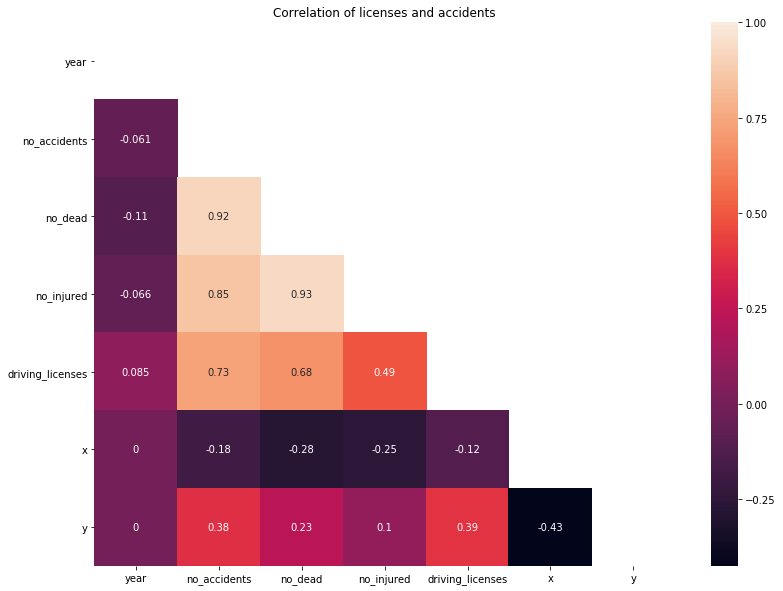

In [494]:
fig, ax = plt.subplots(figsize=(13,10))         # Sample figsize in inches
# Generate a mask for the upper triangle 
mask = np.zeros_like(df_merged.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_merged.corr(), ax = ax, mask=mask, annot=True)
plt.title('Correlation of licenses and accidents')

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [495]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(ncols=2,nrows=nrows, figsize=(15, 15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], density=True) 
        ax[i].set_xlabel(list_of_columns[i])
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        sns.distplot(dataframe[column], bins=20, kde=False, ax=ax[i], color = 'blue');
    plt.show()
        


/home/abdulmalik0x/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/abdulmalik0x/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/abdulmalik0x/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/abdulmalik0x/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead

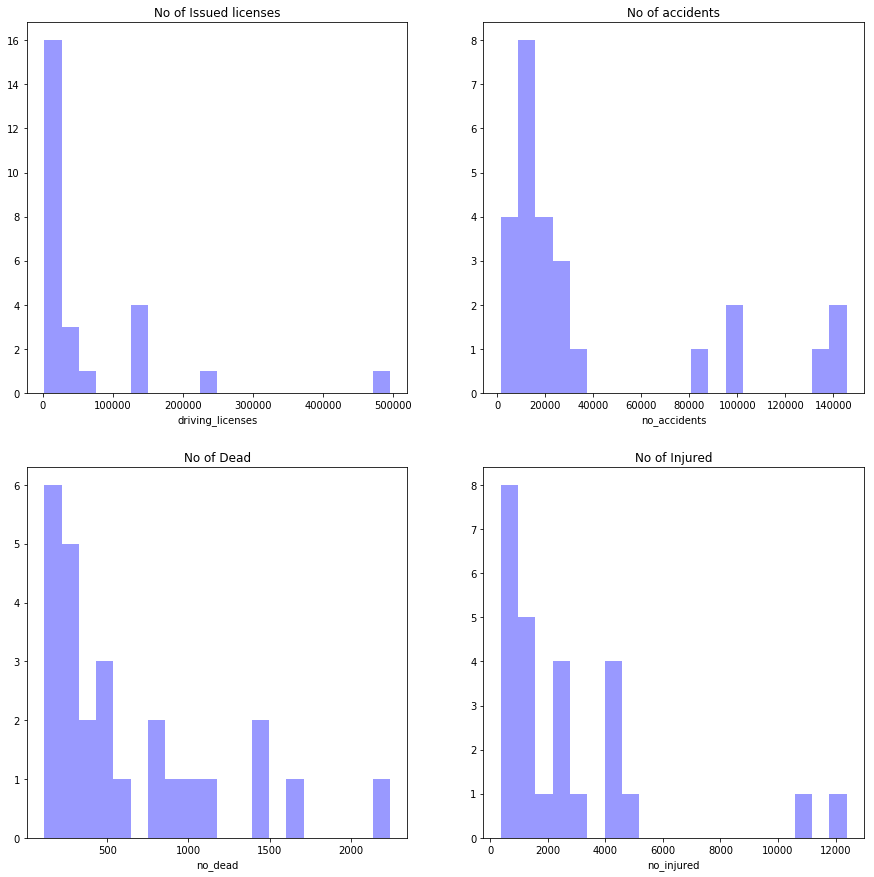

In [496]:
columns_name = ['driving_licenses', 'no_accidents', 'no_dead', 'no_injured']
title_name = ['No of Issued licenses', 'No of accidents', 'No of Dead', 'No of Injured']
subplot_histograms(df_merged, columns_name, title_name);


#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

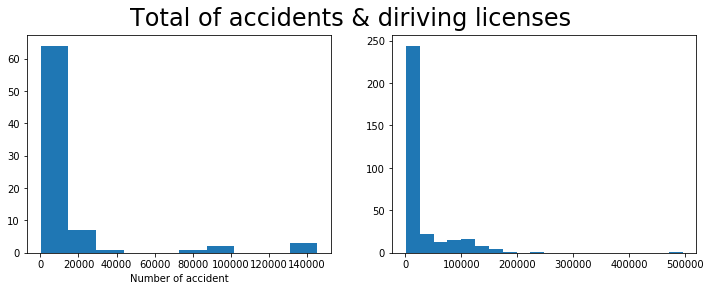

In [497]:
# Code
# Driving Licenses number

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].hist(t_accident['no_accidents'], bins=10)
ax[0].set_xlabel('Number of accident')
ax[0].xlabel = 'Number of accidents'
ax[1].hist(t_licenses['driving_licenses'], bins=20)
# plt.hist(x, bins=20)
fig.suptitle('Total of accidents & diriving licenses', fontsize=24)
plt.show()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


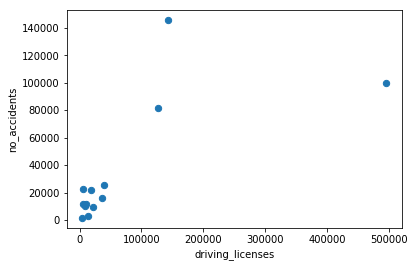

In [498]:
# Driving Licenses vs. Traffic Accidents for 2017

df_merged[df_merged['year'] == 2017].plot(kind='scatter', x='driving_licenses', y='no_accidents', s=40);


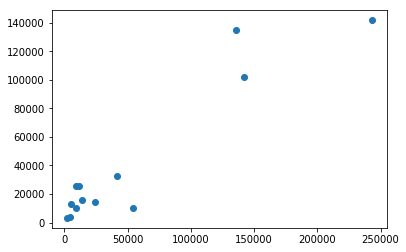

In [499]:
# Driving Licenses vs. Traffic Accidents for 2016

driving_liceses_ = df_merged[df_merged['year'] == 2016]['driving_licenses'].values
accident_2016 = df_merged[df_merged['year'] == 2016]['no_accidents'].values

# scatter(accident_2016, accident_2017, norm=True);
colors = np.where(df_merged["year"]==2017,'y','k')
plt.scatter(driving_liceses_ , accident_2016);

# np.log1p(df_merged[df_merged['year'] == 2016].plot(kind='scatter', x='driving_liceses', y='no_accidents', s=40)


Text(0.5, 1.0, 'Driving Licenses in Saudi Arabia in 2016 & 2017')

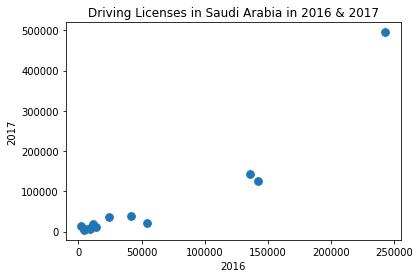

In [500]:
# Driving Licenses for 2016 vs 2017

# One way
Licenses_2016 = df_merged.loc[df_merged['year'] == 2016, "driving_licenses"]
Licenses_2017 = df_merged.loc[df_merged['year'] == 2017, "driving_licenses"]

plt.scatter(Licenses_2016, Licenses_2017, s=60)
plt.xlabel('2016')
plt.ylabel('2017')
plt.title('Driving Licenses in Saudi Arabia in 2016 & 2017')

In [501]:
# Code

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

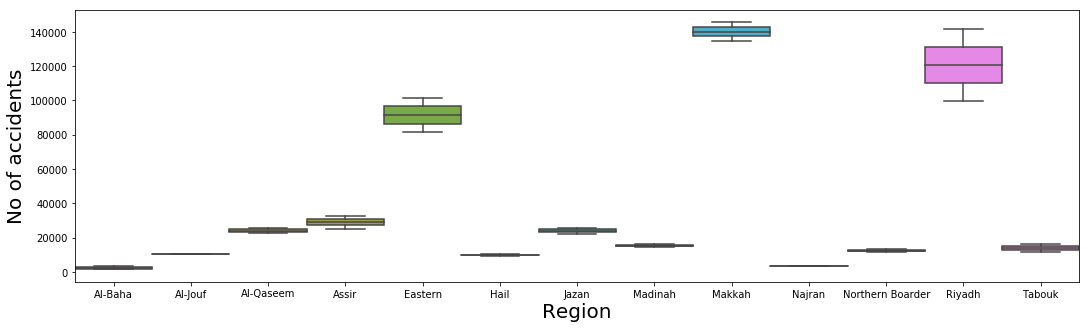

In [502]:
# Code
import seaborn as sns
import scipy

ax, fig = plt.subplots(1, 1, figsize=(18, 5))

sns.boxplot(df_merged.region, df_merged.no_accidents, width=1)
plt.ylabel('No of accidents', size=20)
plt.xlabel('Region', size=20);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

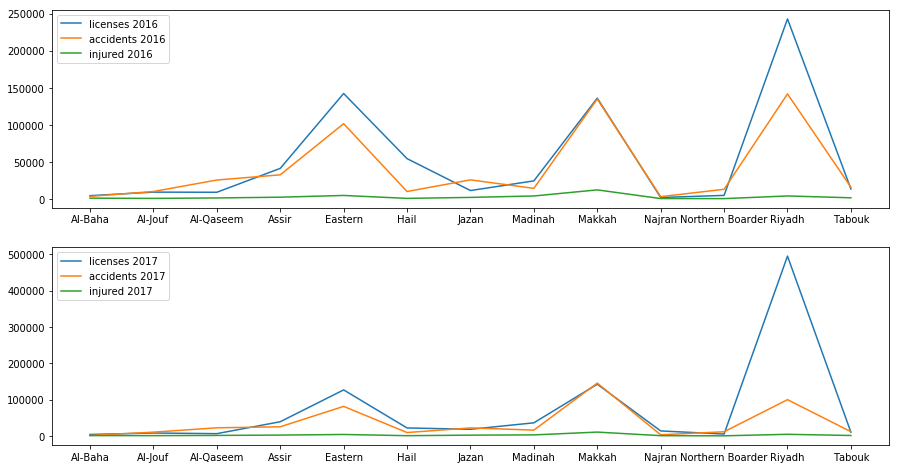

In [503]:
# (Additional), to compare between 2016 and 2017, as we can see, number of accidents in Riyadh have decreased with relative increase in issued No of licenses.
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
ax[0].plot(df_merged.loc[df_merged['year'] == 2016]["region"], df_merged.loc[df_merged['year'] == 2016]['driving_licenses'],  label='licenses 2016')
ax[0].plot(df_merged.loc[df_merged['year'] == 2016]["region"], df_merged.loc[df_merged['year'] == 2016]['no_accidents'],  label='accidents 2016')
ax[0].plot(df_merged.loc[df_merged['year'] == 2016]["region"], df_merged.loc[df_merged['year'] == 2016]['no_injured'],  label='injured 2016')
ax[0].legend(loc='upper left')

ax[1].plot(df_merged.loc[df_merged['year'] == 2017]["region"], df_merged.loc[df_merged['year'] == 2017]['driving_licenses'],  label='licenses 2017')
ax[1].plot(df_merged.loc[df_merged['year'] == 2017]["region"], df_merged.loc[df_merged['year'] == 2017]['no_accidents'],  label='accidents 2017')
ax[1].plot(df_merged.loc[df_merged['year'] == 2017]["region"], df_merged.loc[df_merged['year'] == 2017]['no_injured'],  label='injured 2017')
ax[1].legend(loc='upper left')
plt.show()

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

(array([], dtype=int64),)
3213
13870.261624127063
-0.04665100070037036


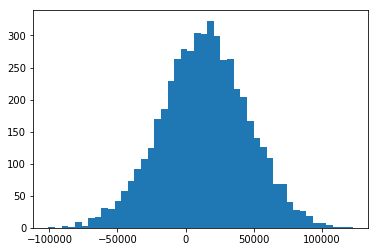

In [504]:
from scipy.stats import skew 

mu = np.mean(t_accident.no_accidents)
sigma = np.std(t_accident.no_accidents)

sample = np.random.normal(mu, sigma, 5000)
print(np.where(sample == sample.argmax()))
print(sample.argmax())
print(sample.mean())
print(skew(sample))

plt.hist(sample, bins='auto');

value of skeness : 0.0021895752237435446


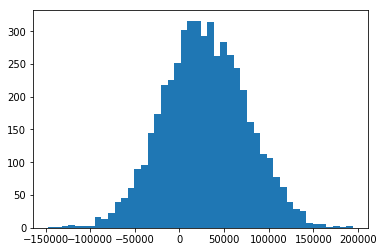

In [505]:
mu = np.mean(t_licenses.driving_licenses)
sigma = np.std(t_licenses.driving_licenses)

sample = np.random.normal(mu, sigma, 5000)
print("value of skeness : {}".format(skew(sample)))

plt.hist(sample, bins='auto');

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

- Traffic accident is skewed to the left meaning that is more weight in the left which means less number of accidents than the mean.
- No. of driving licenses is skewed to the right, means that issued number of licenses is more than the average. 


# Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [535]:
# Code
# H1: The penalities have decreased the number of accident in 2017 by 20%, 
# H0: The penalities have'nt decreased the number of accident in 2017 by 20% (Mean 2016 == Mean 2017)
# a (Alpha) is 0.10

sample_2016 = t_accident[t_accident['year'] == 2016]['no_accidents']
sample_2017 = t_accident[t_accident['year'] == 2017]['no_accidents']

len(sample_2016)

39

In [532]:
# Let's visulize t-stat
xpoints = np.linspace(-4, 4, 500)
# t-stat pdf (point, degree of freedom, )
ypoints = stats.t.pdf(xpoints, len(sample_2016) + len(sample_2017) - 2, 0, 1)

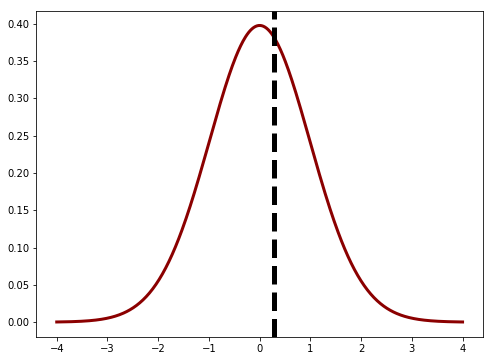

In [533]:
# equal_var because these two samples have huge different in variance between each other.
t_test_result = stats.ttest_ind(sample_2016, sample_2017, equal_var=False)

fig = plt.figure(figsize=(8, 6)) # Figure size on fig
ax = fig.gca() # get the current axis from the figure initiated
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')
ax.axvline(t_test_result.statistic, color='black', linewidth=5, linestyle='--')


In [534]:
# means we'd expect to see data as extreme as our sample due to chance about 76% of the time if the null hypothesis was true
# The probability of gitting value differ values is 77 %.
# By this value, we accept the null hypothesis value
t_test_result

Ttest_indResult(statistic=0.28159461200353947, pvalue=0.7790313475473333)

## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

- I found some interesting patterns in Riyadh, Makkah and Eastern since they have the majority of the data. 

Text(0.5, 1.0, 'No. of issued licenses per region in 2016 & 2017')

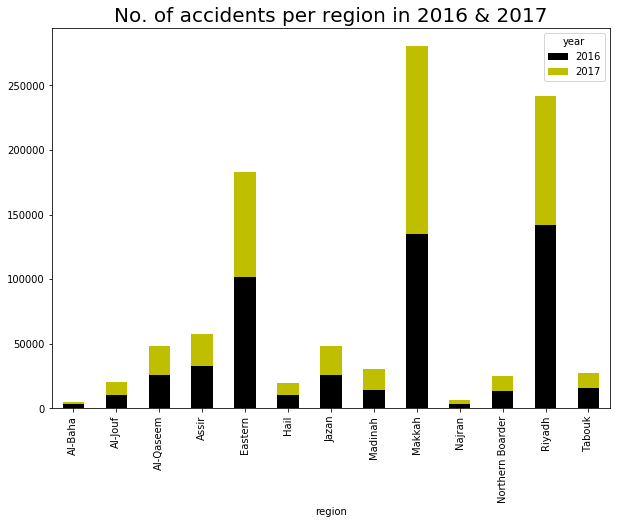

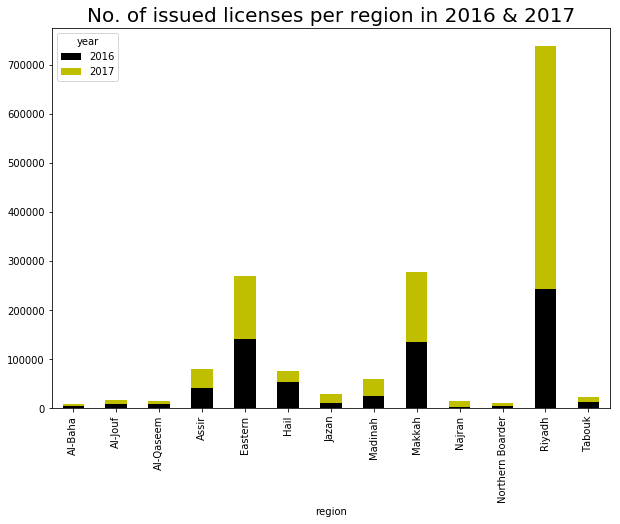

In [510]:



pivot_df = df_merged.pivot(index='region', columns='year', values='no_accidents')
pivot_df.loc[:,[2016, 2017]].plot.bar(stacked=True, color=colors, figsize=(10,7));
plt.title('No. of accidents per region in 2016 & 2017', size=20)
pivot_df = df_merged.pivot(index='region', columns='year', values='driving_licenses')
pivot_df.loc[:,[2016, 2017]].plot.bar(stacked=True, color=colors, figsize=(10,7));
plt.title('No. of issued licenses per region in 2016 & 2017', size=20)

In [558]:
# By picking the highest 3 cities, let's take some insights



data_2016 = { #'Year':['2016', '2017'], 
        'Region':['Riyadh', 'Makkah', 'Eastern'], 
        'Number of accidents':[
                            (df_merged.loc[df_merged['region'] == 'Riyadh']['no_accidents']).iloc[0], 
                            (df_merged.loc[df_merged['region'] == 'Makkah']['no_accidents']).iloc[0],\
                            (df_merged.loc[df_merged['region'] == 'Eastern']['no_accidents']).iloc[0]
                              ], 
        'Precentage of injured (per 1000 accident)':[
                    ((df_merged.loc[df_merged['region'] == 'Riyadh']['no_accidents'] / \
                          (df_merged.loc[df_merged['region'] == 'Riyadh']['no_injured'] * 1000)) * 100).iloc[0], 
                    ((df_merged.loc[df_merged['region'] == 'Makkah']['no_accidents'] / \
                          (df_merged.loc[df_merged['region'] == 'Makkah']['no_injured'] * 1000)) * 100).iloc[0],\
                    ((df_merged.loc[df_merged['region'] == 'Eastern']['no_accidents'] / \
                          (df_merged.loc[df_merged['region'] == 'Eastern']['no_injured'] * 1000)) * 100).iloc[0]], 
        'Precentage of dead (per 1000 accident)':[
                        ((df_merged.loc[df_merged['region'] == 'Riyadh']['no_accidents'] / \
                                  (df_merged.loc[df_merged['region'] == 'Riyadh']['no_dead'] * 1000)) * 100).iloc[0], 
                            ((df_merged.loc[df_merged['region'] == 'Makkah']['no_accidents'] / \
                                  (df_merged.loc[df_merged['region'] == 'Makkah']['no_dead'] * 1000)) * 100).iloc[0],\
                            ((df_merged.loc[df_merged['region'] == 'Eastern']['no_accidents'] / \
                                  (df_merged.loc[df_merged['region'] == 'Eastern']['no_dead'] * 1000)) * 100).iloc[0]
        ], 'Year':[
                       '2016','2016','2016']} 

data_2017 = {
        'Region':['Riyadh', 'Makkah', 'Eastern'], 
        'Number of accidents':[
                            (df_merged.loc[df_merged['region'] == 'Riyadh']['no_accidents']).iloc[1], 
                            (df_merged.loc[df_merged['region'] == 'Makkah']['no_accidents']).iloc[1],\
                            (df_merged.loc[df_merged['region'] == 'Eastern']['no_accidents']).iloc[1]
                              ], 
        'Precentage of injured (per 1000 accident)':[
                    ((df_merged.loc[df_merged['region'] == 'Riyadh']['no_accidents'] / \
                          (df_merged.loc[df_merged['region'] == 'Riyadh']['no_injured'] * 1000)) * 100).iloc[1], 
                    ((df_merged.loc[df_merged['region'] == 'Makkah']['no_accidents'] / \
                          (df_merged.loc[df_merged['region'] == 'Makkah']['no_injured'] * 1000)) * 100).iloc[1],\
                    ((df_merged.loc[df_merged['region'] == 'Eastern']['no_accidents'] / \
                          (df_merged.loc[df_merged['region'] == 'Eastern']['no_injured'] * 1000)) * 100).iloc[1]], 
        'Precentage of dead (per 1000 accident)':[
                        ((df_merged.loc[df_merged['region'] == 'Riyadh']['no_accidents'] / \
                                  (df_merged.loc[df_merged['region'] == 'Riyadh']['no_dead'] * 1000)) * 100).iloc[1], 
                            ((df_merged.loc[df_merged['region'] == 'Makkah']['no_accidents'] / \
                                  (df_merged.loc[df_merged['region'] == 'Makkah']['no_dead'] * 1000)) * 100).iloc[1],\
                            ((df_merged.loc[df_merged['region'] == 'Eastern']['no_accidents'] / \
                                  (df_merged.loc[df_merged['region'] == 'Eastern']['no_dead'] * 1000)) * 100).iloc[1]
        ] , 'Year':[
                       '2017','2017','2017']
        } 


df1 = pd.DataFrame(data_2016) 
df2 = pd.DataFrame(data_2017) 
df = pd.concat([df1, df2])
df.reset_index(drop=True)   

,Region,Number of accidents,Precentage of injured (per 1000 accident),Precentage of dead (per 1000 accident),Year
0,Riyadh,141736,3.369052,9.911608,2016
1,Makkah,134838,1.088896,6.011502,2016
2,Eastern,101619,2.076824,9.130189,2016
3,Riyadh,99925,2.200991,7.142602,2017
4,Makkah,145541,1.370056,8.869043,2017
5,Eastern,81433,1.999337,8.456179,2017


<Figure size 720x720 with 0 Axes>

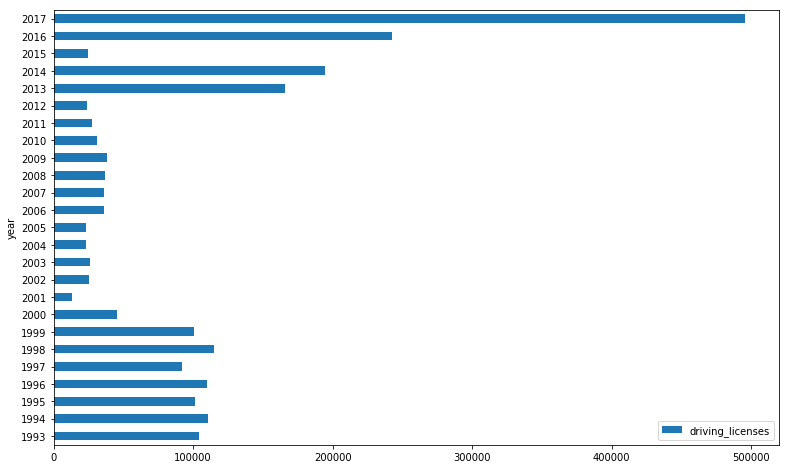

In [614]:
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = (13,8)
t_licenses[t_licenses['region'] == 'Riyadh'].sort_values('year').plot('year','driving_licenses',kind='barh')
plt.show()


## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?